In [58]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from typing import List, Tuple

In [129]:
# Custom tick formatter function
def format_bytes(x, pos):
    suffixes = ['B', 'KB', 'MB', 'GB', "TB"]
    index = 0
    while x >= 1000 and index < len(suffixes) - 1:
        x /= 1024
        index += 1
    return f"{x:.2f} {suffixes[index]}"

In [171]:
def display(log_path, _x, y, t, high_light: List[int]=None, formatter=format_bytes, log=True, marker="o"):
    with open(log_path) as f:
        lines = [[float(x) for x in y.split("|")] for y in f.readlines()]
    lines = np.array(lines)

    plt.figure(figsize=(17, 5))
    plt.plot(lines[:, 0], lines[:, 1], marker=marker)
    if log:
        plt.xscale("log")
    plt.xticks(lines[:, 0].tolist())
    if formatter is not None:
        plt.gca().xaxis.set_major_formatter(formatter)
    # rotate xticks
    plt.xticks(rotation=75)
    # hide small ticks
    plt.tick_params(axis='x', which='minor', bottom=False)

    if high_light is not None:
        for x in high_light:
            plt.axvline(x=x, color="red", linestyle="--")
    
    plt.xlabel(_x)
    plt.ylabel(y)
    plt.title(t)

    plt.show()

In [160]:
def display_multi(log_path, _x, y, t, high_light: List[int]=None, formatter=format_bytes, log=True, marker="o"):
    with open(log_path) as f:
        bare = f.read().split("-\n")[1:]
    groups = {}
    for lines in bare:
        splitted_lines = lines.split("\n")
        print("Bare", splitted_lines)
        groups[splitted_lines[0]] = np.array([[float(x) for x in y.split("|")] for y in splitted_lines[1:] if y])

    plt.figure(figsize=(17, 5))
    for k, lines in groups.items():
        plt.plot(lines[:, 0], lines[:, 1], marker=marker, label=str(k))
    if log:
        plt.xscale("log")
    plt.xticks(lines[:, 0].tolist())
    if formatter is not None:
        plt.gca().xaxis.set_major_formatter(formatter)

    # rotate xticks
    plt.xticks(rotation=75)
    # hide small ticks
    plt.tick_params(axis='x', which='minor', bottom=False)

    if high_light is not None:
        for x in high_light:
            plt.axvline(x=x, color="red", linestyle="--")

    plt.ylim(325, 600)
    plt.xlabel(_x)
    plt.ylabel(y)
    plt.title(t)
    plt.legend()
    plt.show()

Bare ['512', '1024|334', '1280|334', '1536|334', '1792|334', '2048|334', '2560|335', '3072|334', '3584|334', '4096|334', '5120|334', '6144|334', '7168|334', '8192|334', '10240|334', '12288|334', '14336|334', '16384|334', '20480|335', '24576|334', '28672|334', '32768|334', '40960|334', '49152|334', '57344|335', '65536|334', '81920|334', '98304|334', '114688|334', '131072|334', '163840|335', '196608|334', '229376|334', '262144|334', '327680|334', '393216|334', '458752|334', '524288|335', '655360|334', '786432|334', '917504|334', '1048576|334', '1310720|334', '1572864|335', '1835008|335', '2097152|353', '2621440|370', '3145728|371', '3670016|372', '4194304|371', '5242880|372', '6291456|372', '7340032|373', '8388608|373', '10485760|375', '12582912|374', '14680064|375', '16777216|375', '20971520|376', '25165824|380', '29360128|383', '33554432|396', '41943040|431', '50331648|485', '58720256|542', '67108864|586', '83886080|677', '100663296|741', '117440512|769', '134217728|775', '167772160|84

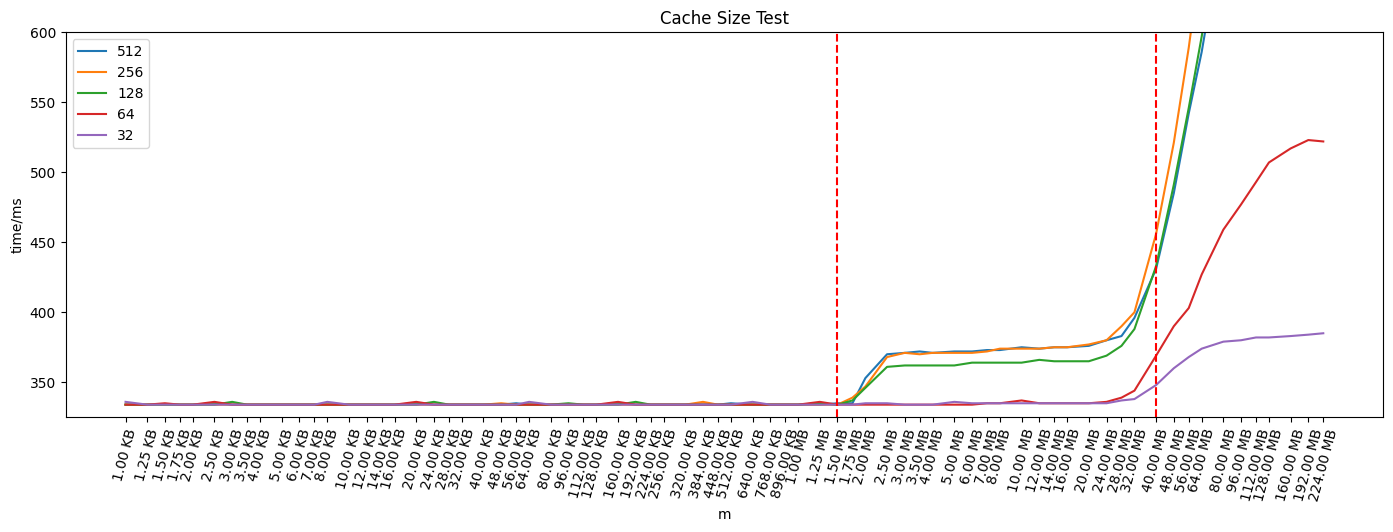

In [169]:
display_multi("result_cache_size.txt", "m", "time/ms", "Cache Size Test", [
    1.5 * 1024 * 1024, 
    40 * 1024 * 1024,
], marker=None)

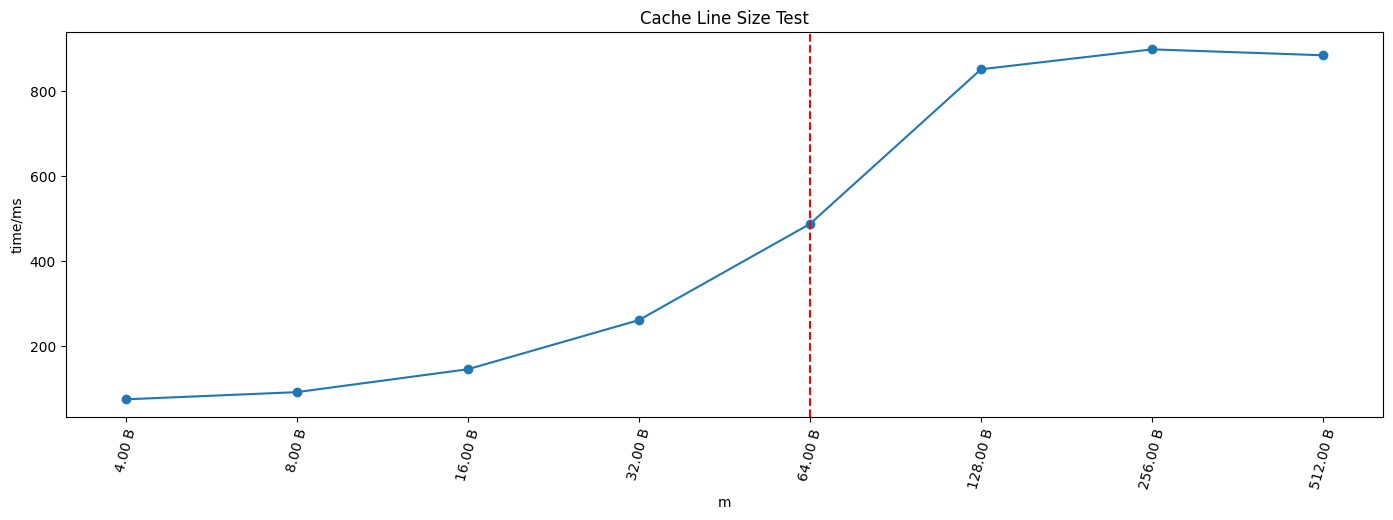

In [172]:
display("result_cache_line_size.txt", "m", "time/ms", "Cache Line Size Test", [64])

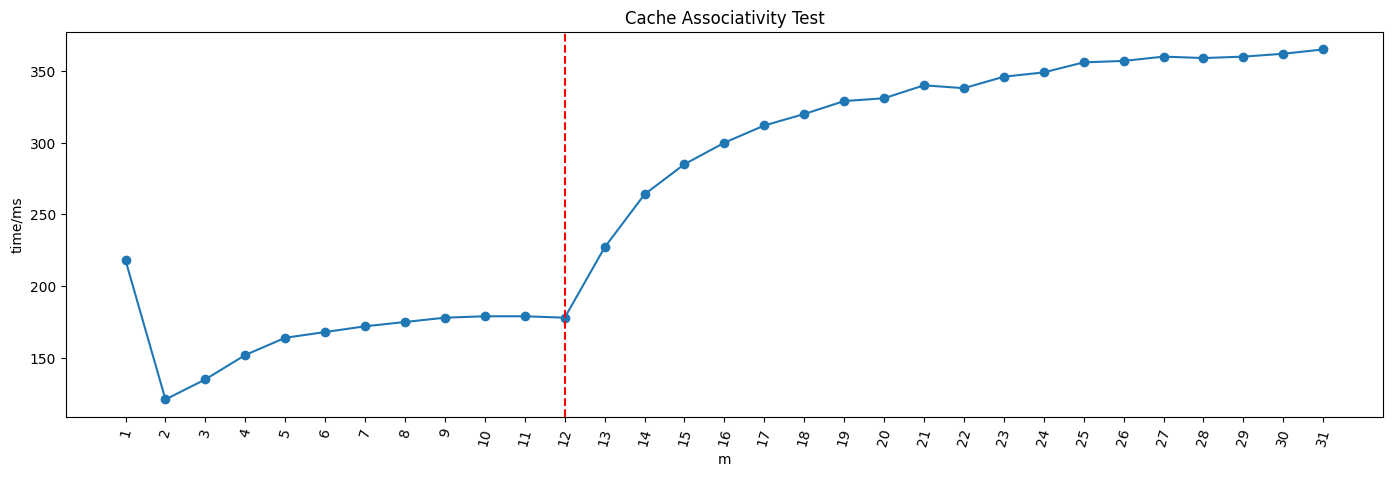

In [175]:
display("result_cache_associativity.txt", "m", "time/ms", "Cache Associativity Test", [12], formatter=None, log=False)